In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from plot_classifier import plot_classifier

In [2]:
import re
import graphviz
from sklearn.tree import export_graphviz

def display_tree(feature_names, tree):
    """ For binary classification only """
    dot = export_graphviz(tree, out_file=None, feature_names=feature_names, class_names=tree.classes_.astype(str), impurity=False)
    # adapted from https://stackoverflow.com/questions/44821349/python-graphviz-remove-legend-on-nodes-of-decisiontreeclassifier
    dot = re.sub('(\\\\nsamples = [0-9]+)(\\\\nvalue = \\[[0-9]+, [0-9]+\\])(\\\\nclass = [A-Za-z0-9]+)', '', dot)
    dot = re.sub(     '(samples = [0-9]+)(\\\\nvalue = \\[[0-9]+, [0-9]+\\])\\\\n', '', dot)
    return graphviz.Source(dot)

In [5]:
df = pd.read_csv('data/330-students-cilantro.csv')
df.head()

,What percentage of days do you typically eat meat or fish?,What percentage grade do you expect to get in this course?,Do you like cilantro?
0,42.0,90,Yes
1,85.0,83,No
2,28.0,83,Yes
3,100.0,80,No
4,100.0,75,No


In [7]:
# rename columns
df.columns = ["meat", "grade", "cilantro"]
df.head()

,meat,grade,cilantro
0,42.0,90,Yes
1,85.0,83,No
2,28.0,83,Yes
3,100.0,80,No
4,100.0,75,No


In [9]:
# summary stats
df.describe()

,meat,grade
count,200.000000,200.000000
mean,72.812850,83.440000
std,31.605226,8.633603
min,0.000000,4.000000
25%,50.000000,80.000000
50%,86.000000,85.000000
75%,100.000000,90.000000
max,100.000000,100.000000


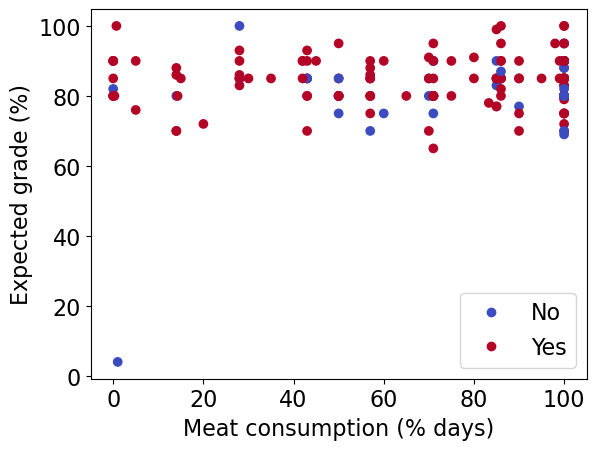

In [11]:
scatter = plt.scatter(df["meat"], df["grade"], c=df["cilantro"]=="Yes", cmap=plt.cm.coolwarm);
plt.xlabel("Meat consumption (% days)");
plt.ylabel("Expected grade (%)");
plt.legend(scatter.legend_elements()[0], ["No", "Yes"]);

In [13]:
df["cilantro"].value_counts()

cilantro
Yes    144
No      56
Name: count, dtype: int64

In [15]:
# features/input/feature selection/input variable
# inputs / predictors / explanatory variables / regressors / independent variables / covariates
X = df[["meat", "grade"]]
X.head()

,meat,grade
0,42.0,90
1,85.0,83
2,28.0,83
3,100.0,80
4,100.0,75


In [17]:
# target/response variable
# outputs / outcomes / response variable / dependent variable / labels (if categorical).
# the thing we are going to predict.
y = df["cilantro"]
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: cilantro, dtype: object

In [19]:
dc = DummyClassifier(strategy="prior")
dc.fit(X, y)
dc.score(X, y)

0.72

In [21]:
y.value_counts()/len(y)

cilantro
Yes    0.72
No     0.28
Name: count, dtype: float64

## Decision trees

In [24]:
tree1 = DecisionTreeClassifier(max_depth=1)
tree1.fit(X, y);

- above, we create a `DecisionTreeClassifier` object from scikit-learn.
- We pass in parameters - these are called **hyperparameters** - in this case `max_depth=1` which means the tree can only have depth 1.
- Next we fit to the data using `.fit()`.
- The semicolon is just cosmetic, otherwise some junk gets printed out.

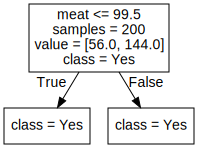

In [27]:
display_tree(df.columns[:-1], tree1)

- This is a totally useless decision tree that predicts "Yes" for any feature.
- This happens sometimes. Let's roll with it for the moment.

In [47]:
plot_classifier(X, y, tree1, ticks=True, vmin=0, vmax=1); # note to self: need to set vmin/vmax to to an issue with plot_classifier that always draws blue if all predictions are the same
plt.xlabel("Meat consumption (% days)");
plt.ylabel("Expected grade (%)");

InvalidIndexError: (slice(None, None, None), 0)

In [32]:
tree1.score(X, y)

0.72

- This is doing the same thing as `DummyClassifier` so we get the same score.
- We can verify this using `.predict()`

In [35]:
tree1.predict([[50, 50]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [37]:
tree1.predict([[99,99]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [39]:
tree1.predict(X)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes',

In [41]:
# make the tree deeper 
tree2 = DecisionTreeClassifier(max_depth=2)
tree2.fit(X, y);

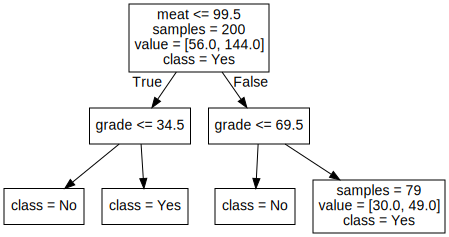

In [43]:
display_tree(df.columns[:-1], tree2)

In [45]:
plot_classifier(X, y, tree2, ticks=True, show_data=True);
plt.xlabel("Meat consumption (% days)");
plt.ylabel("Expected grade (%)");

TypeError: plot_classifier() got an unexpected keyword argument 'show_data'

In [49]:
tree2.score(X, y)

0.73

- what does `.score()` do?
- It calls `predict` and then compares the predictions to the true labels.

In [52]:
(tree2.predict(X) == y).sum()/len(y)

0.73

In [54]:
# or
(tree2.predict(X) == y).mean()

0.73

In [56]:
# max_depth=None
tree = DecisionTreeClassifier(max_depth=None)
tree.fit(X, y);

In [58]:
tree.predict([[90, 90]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

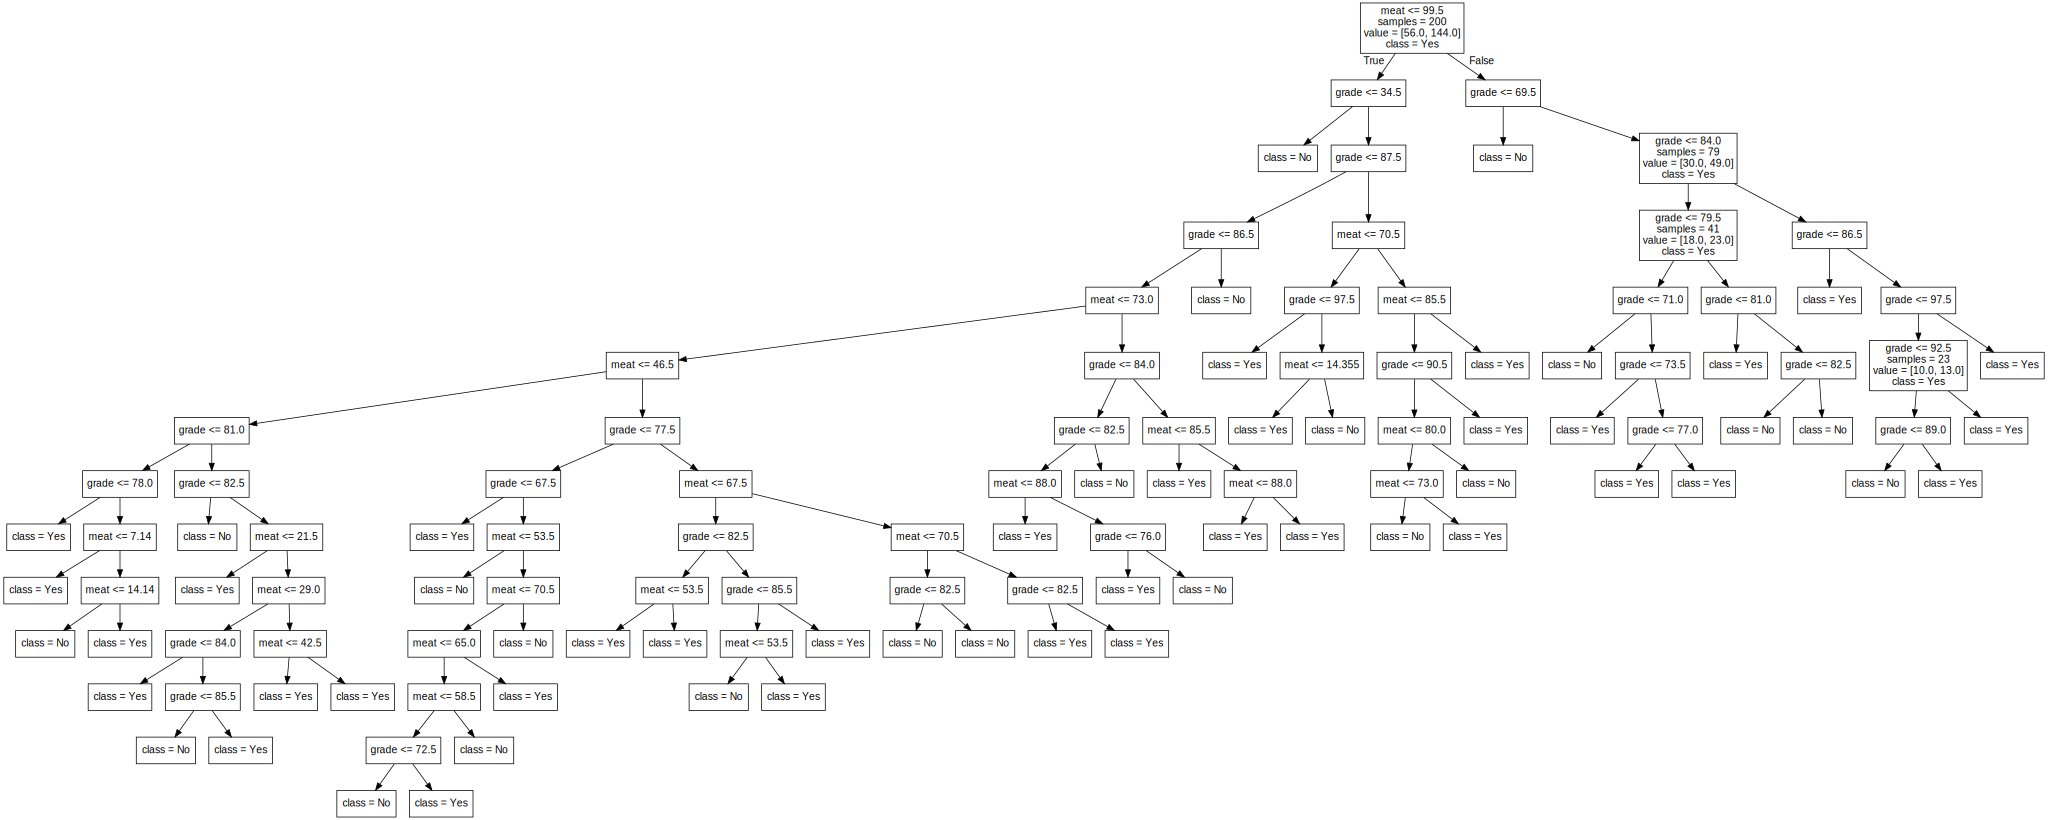

In [60]:
display_tree(df.columns[:-1], tree)

In [62]:
plot_classifier(X, y, tree, ticks=True);
plt.xlabel("Meat consumption (% days)");
plt.ylabel("Expected grade (%)");

InvalidIndexError: (slice(None, None, None), 0)

In [64]:
tree.score(X, y)

0.805

The reason it's not getting 100% accuracy: instances of duplicated features

In [69]:
# some duplicates
df.loc[df.duplicated(subset=df.columns[:-1], keep=False)].sort_values(by=df.columns.values.tolist()).head(20)

,meat,grade,cilantro
19,0.0,80,Yes
62,0.0,80,Yes
100,0.0,80,Yes
143,0.0,90,Yes
170,0.0,90,Yes
198,0.0,90,Yes
69,14.0,70,Yes
130,14.0,70,Yes
31,28.0,85,No
162,28.0,85,No


If we remove the "duplicates" (cases where X is the same, not y) then we can get 100% accuracy:

In [72]:
# remove duplicates
df_nodup = df.sort_values(by="cilantro").drop_duplicates(subset=df.columns[:-1]).reset_index(drop=True)

In [74]:
df_nodup.shape

(95, 3)

In [76]:
df_nodup.loc[df_nodup.duplicated(subset=df_nodup.columns[:-1], keep=False)].sort_values(by=df_nodup.columns.values.tolist()).head(20)

,meat,grade,cilantro


In [78]:
X_nodup = df_nodup.iloc[:,:2]
y_nodup = df_nodup.iloc[:,-1]

In [80]:
X_nodup.head()

,meat,grade
0,100.0,90
1,100.0,83
2,70.0,80
3,57.0,85
4,57.0,70


In [82]:
y_nodup.head()

0    No
1    No
2    No
3    No
4    No
Name: cilantro, dtype: object

In [84]:
tree_nodup = DecisionTreeClassifier() # default is max_depth=None

In [86]:
tree_nodup.fit(X_nodup, y_nodup);

In [88]:
tree_nodup.score(X_nodup, y_nodup)

1.0

In [90]:
plot_classifier(X_nodup, y_nodup, tree_nodup, ticks=True);
plt.xlabel("Meat consumption (% days)");
plt.ylabel("Expected grade (%)");

InvalidIndexError: (slice(None, None, None), 0)


- **parameters** are automatically learned by the algorithm during training (`fit`)
- **hyperparameters** are specified by the human, before `fit`, based on:
    - expert knowledge
    - heuristics, or 
    - systematic/automated optimization

## Overfitting

How does accuracy change vs. max_depth?

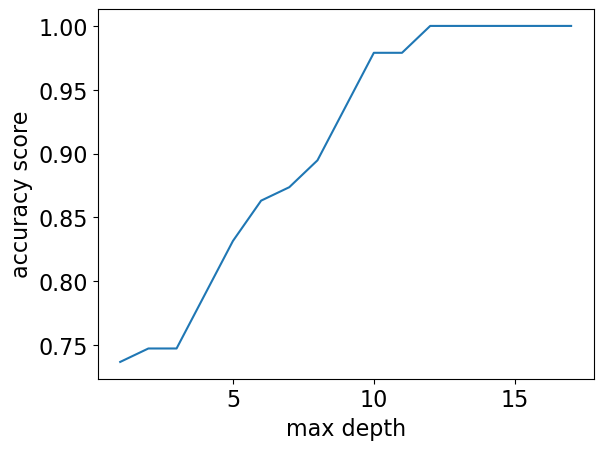

In [97]:
max_depths = np.arange(1, 18)
scores = [DecisionTreeClassifier(max_depth=max_depth).fit(X_nodup, y_nodup).score(X_nodup, y_nodup) for max_depth in max_depths]
plt.plot(max_depths, scores);
plt.xlabel("max depth");
plt.ylabel("accuracy score");

- Why not use a very deep decision tree for every supervised learning problem and get high accuracy?
- The goal of supervised learning is to predict unseen/new data...
  - The above decision tree has 100% accuracy on the training data **where we already know the answer**.
  - It perfectly labels the data we used to make the tree...
  - But we want to know how our model performs on data not used in training.
  - We will split our original dataset into two parts, one for "training" and one for "testing".

In [100]:
from sklearn.model_selection import train_test_split

In [102]:
df_train, df_test = train_test_split(df_nodup)

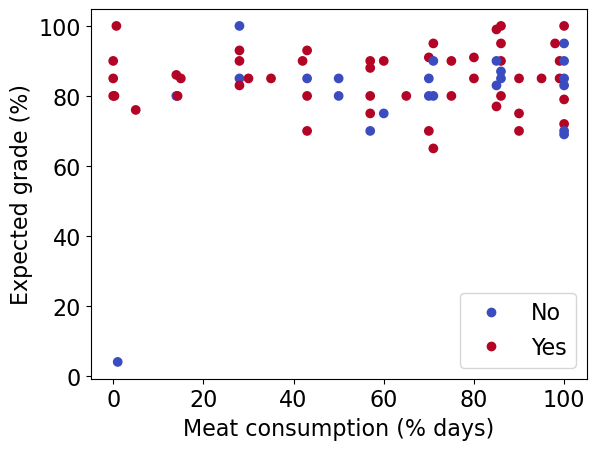

In [104]:
scatter = plt.scatter(df_train["meat"], df_train["grade"], c=df_train["cilantro"]=="Yes", cmap=plt.cm.coolwarm);
plt.xlabel("Meat consumption (% days)");
plt.ylabel("Expected grade (%)");
plt.legend(scatter.legend_elements()[0], ["No", "Yes"]);

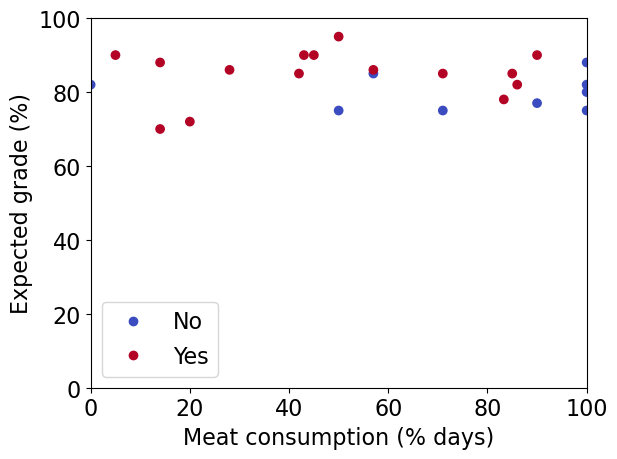

In [106]:
scatter = plt.scatter(df_test["meat"], df_test["grade"], c=df_test["cilantro"]=="Yes", cmap=plt.cm.coolwarm);
plt.xlabel("Meat consumption (% days)");
plt.ylabel("Expected grade (%)");
plt.xlim((0,100));
plt.ylim((0,100));
plt.legend(scatter.legend_elements()[0], ["No", "Yes"]);

## Summary

- Cilantro dataset: predict whether a CPSC 330 student likes cilantro (yes/no) from their meat consumption and expected grade (numeric features)
- Decision trees: a classifier that makes predictions by sequentially looking at features and checking whether they are above/below a threshold
- Decision trees learn axis-aligned decision boundaries (vertical and horizontal lines with 2 features)
- `fit(X,y)`: train classifier from training data
- `predict(X)`: make one or more predictions given a trained classifier
- `score(X,y)`: makes predictions with `predict()` and compares them to the true answers passed in as `y`
- Classifiers have hyperparameters, which are set before calling `fit`
  - Often set by humans, but not always (see later lecture)
- `max_depth` is a hyperparameter of `DecisionTreeClassifier` that controls the maximum depth of the learned tree  
- larger `max_depth` -> larger accuracy on training data
- `DecisionTreeClassifier` with `max_depth=None` not getting 100% training accuracy when two students have the same features but different target values